# UNB - PPGI
# Processamento de Imagem
## Trabalho 07

Henrique Brandão

___

Dada a seguinte imagem 

[warning-triangle.jpg] 

Use processamento de imagens para gerar uma imagem binária da forma geométrica predominante e processamento morfológico para transformar em um objeto sólido.  

Usando o método dos momentos invariantes descubra qual das imagens abaixo mais se encaixa na imagem binária resultante do seu processamento.   

[ imagens.png]  

Entrega é um documento em PDF em formato de relatório. Código só em sessão de anexo/apêndice. Não precisa enrolar nem colocar background, mas precisa discutir o que você está fazendo e discutir os resultados. 

# 1) Isolando a forma

In [1]:
import cv2

import numpy as np
import seaborn as sns

from math import sqrt
from random import choice

from PIL import Image
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
f = 'warning-triangle.jpg'
x = cv2.imread(f)
x = cv2.cvtColor(cv2.imread(f), cv2.COLOR_BGR2RGB)

In [3]:
# fbordas = np.array([
#     [-1, 1, 1],
#     [-1, 0, 1],
#     [-1, 1, 1]])

# tresh = lambda i: cv2.threshold(i, 50, 255, cv2.THRESH_BINARY)[-1]
# conv = lambda i,f: cv2.filter2D(i, -1, f)

# plt.figure(figsize=(12,8))

# k = (45,45)

# __ = (
#     cv2.blur(x, ksize=k),
#     tresh(cv2.blur(x, ksize=k)),
#     conv(tresh(cv2.blur(x, ksize=k)), fbordas),
# )

# for i,_ in enumerate(__):
#     plt.subplot(len(__),3,i+1)
#     plt.imshow(_)
#     plt.xticks([])
#     plt.yticks([])

# plt.show()

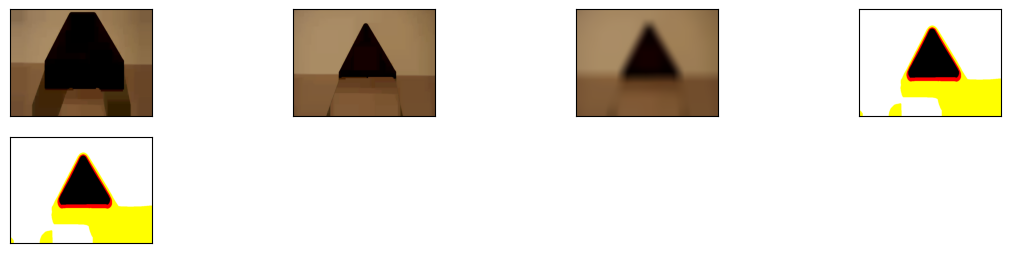

In [7]:
kernel = np.ones((100,100), np.uint8)

erosao = lambda x: cv2.erode(x, kernel, iterations=1)
dilatacao = lambda x: cv2.dilate(x, kernel, iterations=1)
tresh = lambda i: cv2.threshold(i, 50, 255, cv2.THRESH_BINARY)[-1]


plt.figure(figsize=(14,8))

__ = (
    erosao(x),
    dilatacao(erosao(x)),
    cv2.blur(dilatacao(erosao(x)), ksize=(50,50)),
    tresh(cv2.blur(dilatacao(erosao(x)), ksize=(50,50))),
    bordas(tresh(cv2.blur(dilatacao(erosao(x)), ksize=(50,50))))
)

for i,_ in enumerate(__):
    plt.subplot(len(__),4,i+1)
    plt.imshow(_)
    plt.xticks([])
    plt.yticks([])

plt.show()

In [8]:
# y = conv(tresh(cv2.blur(x, ksize=k)), fbordas)
y = tresh(cv2.blur(dilatacao(erosao(x)), ksize=(50,50)))

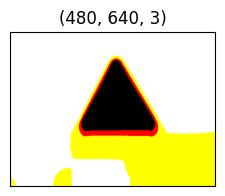

In [9]:
plt.figure(figsize=(3,2))

plt.imshow(y)
plt.title(y.shape)
plt.xticks([])
plt.yticks([])

plt.show()

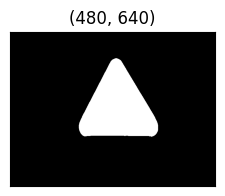

In [10]:
plt.figure(figsize=(3,2))

_ = y[:,:,1]

plt.imshow(_, cmap='Greys')
plt.title(_.shape)
plt.xticks([])
plt.yticks([])

plt.show()

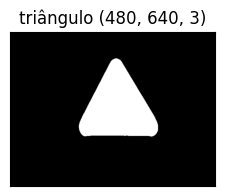

In [11]:
plt.figure(figsize=(3,2))

__ = np.zeros(shape=(480,640,3)).astype(np.uint8)

__[:,:,0] = _
__[:,:,1] = _
__[:,:,2] = _

triangulo = 255 - __

plt.imshow(triangulo)
plt.title(f'triângulo {triangulo.shape}')
plt.xticks([])
plt.yticks([])

plt.show()

# 2) Momentos invariantes

In [12]:
!ls | grep png

disco.png
elipse.png
paralelogramo.png
quadrado.png
trapezio.png
triangulo.png
triangulo2.png
trianguloRetangulo.png


In [13]:
hip = 'disco.png elipse.png paralelogramo.png quadrado.png trapezio.png triangulo.png triangulo2.png trianguloRetangulo.png'.split()
hip = [(h.split('.')[0], cv2.imread(h)) for h in hip]
len(hip)

8

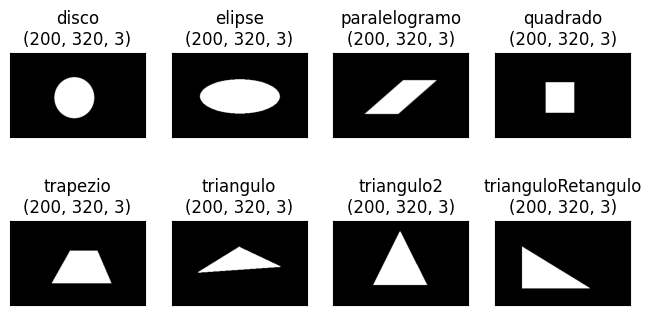

In [14]:
plt.figure(figsize=(8,4))

i = 1
for h in hip:
    plt.subplot(2,4,i)
    plt.title(f'{h[0]}\n{h[-1].shape}')
    plt.imshow(h[-1])
    plt.xticks([])
    plt.yticks([])
    i += 1

plt.show()

In [15]:
# def teste(): 
#     gray = cv2.cvtColor(triangulo, cv2.COLOR_BGR2GRAY)
    
#     # apply thresholding on gray image
#     ret,thresh = cv2.threshold(gray,150,255,0)
    
#     # Find the contours in the image
#     contours,hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#     print("Number of Contours detected:",len(contours))
    
#     # Find the moments of first contour
#     cnt = contours[0]
#     M = cv2.moments(cnt)
    
#     # Draw the contour
#     cv2.drawContours(triangulo, [cnt], -1, (0,255,255), 3)
#     x1, y1 = cnt[0,0]
#     cv2.putText(triangulo, 'Contour:1', (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

#     # print the moments of the first contour
#     print(f'Moments of first contour:\n{M}')
    
#     plt.figure(figsize=(6,8))
#     plt.imshow(triangulo)
#     plt.xticks([])
#     plt.yticks([])
#     plt.show()

# teste()

In [16]:
# def calcula_momentos_invariantes(imagem):
#     # Carregar a imagem e converter para escala de cinza
#     imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
#     # Calcular os momentos invariantes de Hu
#     momentos = cv2.HuMoments(cv2.moments(imagem)).flatten()
#     return momentos

# def compara_momentos_invariantes(momentos1, momentos2, limiar=1e-20):
#     # Calcular a diferença absoluta entre os momentos invariantes
#     diferenca_absoluta = np.abs(momentos1 - momentos2)
#     # Verificar se a diferença absoluta é menor que o limiar
#     similaridade = np.all(diferenca_absoluta < limiar)
#     return diferenca_absoluta, similaridade

# def print_resultado(imagem1, imagem2, momentos1, momentos2, similaridade):
#     # Carregar as imagens
#     imagem1 = cv2.cvtColor(imagem1, cv2.COLOR_BGR2GRAY)
#     imagem2 = cv2.cvtColor(imagem2, cv2.COLOR_BGR2GRAY)
#     # Exibir as imagens
#     plt.subplot(121), plt.imshow(cv2.cvtColor(imagem1, cv2.COLOR_BGR2RGB)), plt.title('Imagem 1')
#     plt.subplot(122), plt.imshow(cv2.cvtColor(imagem2, cv2.COLOR_BGR2RGB)), plt.title('Imagem 2')
#     plt.xticks([])
#     plt.yticks([])
#     plt.show()
#     # Exibir os momentos invariantes e a similaridade
#     # print(f'Momentos Invariantes da Imagem 1: {momentos1}')
#     # print(f'Momentos Invariantes da Imagem 2: {momentos2}')
#     print(f'Similaridade entre as imagens: {similaridade}')

In [17]:
# def run(i1, i2):
#     # Calcular momentos invariantes para cada imagem
#     momentos_imagem1 = calcula_momentos_invariantes(i1)
#     momentos_imagem2 = calcula_momentos_invariantes(i2)
#     # Comparar os momentos invariantes
#     diff, similaridade = compara_momentos_invariantes(momentos_imagem1, momentos_imagem2)
#     distancia = np.linalg.norm(momentos_imagem2 - momentos_imagem1)
#     # Exibir as imagens e os resultados
#     # print_resultado(i1, i2, momentos_imagem1, momentos_imagem2, similaridade)
#     return diff

In [18]:
# run(triangulo, hip[0][-1])
# run(triangulo, hip[1][-1])
# run(triangulo, hip[2][-1])
# run(triangulo, hip[3][-1])
# run(triangulo, hip[4][-1])
# run(triangulo, hip[5][-1])
# run(triangulo, hip[6][-1])
# run(triangulo, hip[7][-1])

In [19]:
def run(i1, i2):
    i1, i2 = cv2.cvtColor(i1, cv2.COLOR_BGR2GRAY), cv2.cvtColor(i2, cv2.COLOR_BGR2GRAY)
    m1, m2 = cv2.moments(i1), cv2.moments(i2)
    hum1, hum2 = cv2.HuMoments(m1), cv2.HuMoments(m2)
    # dist = np.linalg.norm(hum1 - hum2)
    dist_hu7 = np.abs(hum1[-1] - hum2[-1])
    return dist_hu7

In [20]:
deltas = []

for h in hip:
    d = run(triangulo, h[-1])
    deltas.append((h[0], d))

In [21]:
sorted(deltas, key=lambda x: x[-1])

[('triangulo2', array([5.97450393e-25])),
 ('paralelogramo', array([1.89609713e-24])),
 ('disco', array([1.89609713e-24])),
 ('elipse', array([1.89609713e-24])),
 ('quadrado', array([1.89609713e-24])),
 ('trapezio', array([5.18521808e-23])),
 ('triangulo', array([3.74813534e-21])),
 ('trianguloRetangulo', array([4.88647881e-21]))]

In [24]:
_ = sorted(deltas, key=lambda x: x[-1])[0][0]

print(f'A figura mais próxima é o(a): {_}')

A figura mais próxima é o(a): triangulo2
